# CSCI 3022: Intro to Data Science - Spring 2018 Practicum 
***
- <span style="color:blue">Version 1.01 - clarified problem 1B (in blue text).</span>
- <span style="color:green">Version 1.02 - clarified problem 1D (in green text).</span>
- <span style="color:red">Version 1.03 - clarified problem 2D (in red text).</span>


This practicum is due on Moodle by **11:55pm on Wednesday May 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: 

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
import statsmodels.api as sm
%matplotlib inline

/Users/larremore/Desktop/Dropbox/python/env3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### [35 points] Problem 1: Malaria Parasite Problems
***

Malaria parasites are very good at evading the immune system. Each parasite's genome has 60 different versions of a key immune evasion gene, so that when you get malaria, instead of simply getting sick and then getting better, the parasite switches among its 60 genes, sequentially, thereby changing its camouflage over and over and over. This is one of the reasons that malaria is still a huge problem today: you never develop a really strong immunity to the overall parasite population, due to its huge genetic diversity. You can read more about this [here](https://www.quantamagazine.org/networks-untangle-malarias-deadly-shuffle-20151015/) if you like. 

Here we are concerned with helping out lab scientists in desigining and evaluating their genetic sequencing experiments which target _var_ genes. The setup is as follows:

* Each parasite has a repertoire of 60 different genes.
* A process called PCR is applied to a parasite genome. It may or may not be successful in producing the genetic sequence of one of the genes. The probability that a PCR fails entirely is $f$. 
* If PCR succeeds, a genetic sequence is produced, and this sequence is chosen uniformly at random from among the total 60 genes. 
* PCR does not deplete the DNA in the sample, meaning that if one repeats the PCR process, the same gene might be sequenced _or_ a different one of the 60 genes might be sequenced.
* To be clear: repeating PCR might sample a previously sampled gene, or it might sample another one of the 60. Then again, any individual PCR fails with probability $f$.

**Part A**: Suppose you have the budget to do $r$ PCR attempts. Let $k$ be the number of PCRs that are successful. Since $k$ is a random variable, what is the name of its distribution? What is the expected value of $k$, and how does it depend on $r$? What is the standard deviation of $k$?

**Solution**

$k$ will be distributed according to a Binomial with $r$ trials and probability $1-f$. The expected value of $k$ is $r(1-f)$.  The variance is $rf(1-f)$ so the standard deviation is $\sqrt{rf(1-f)}$.

***

**Part B**: Write a function called `draw_pcr_samples(r,f,var_repertoire)` that makes $r$ repeated attemps at PCR, each with independent probability of failure $f$. This code must return a list of the successfully sequenced var genes. For your convenience, please use the list `var_repertoire` below as the 60 possible var genes that are being sampled. <span style="color:blue">When written correctly, the output of this code will change each time, depending on the success or failure of each PCR, and which var gene is chosen. To examine the output of your function, please repeatedly call it under three different conditions, and produce the following histograms: </span>
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=48$ and $f=0$. Make this histogram `blue`.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=60$ and $f=0.2$. Make this histogram `green`.
* <span style="color:blue">distribution of the</span> number of unique var genes sampled for $r=120$ and $f=0.6$. Make this histogram `gold`.

In [3]:
var_repertoire = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
                  'r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H',
                 'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                 'π','ø','ß','∆','ç','Ω','µ','∞']

In [4]:
def draw_pcr_samples(r,f,var_repertoire):
    draws = np.random.binomial(r,1-f)
    samples = np.random.choice(var_repertoire,size=draws)
    return list(set(samples))

In [5]:
n_unique = []
n_unique.append([len(draw_pcr_samples(48,0,var_repertoire)) for ii in range(10000)])
n_unique.append([len(draw_pcr_samples(60,0.2,var_repertoire)) for ii in range(10000)])
n_unique.append([len(draw_pcr_samples(120,0.6,var_repertoire)) for ii in range(10000)])

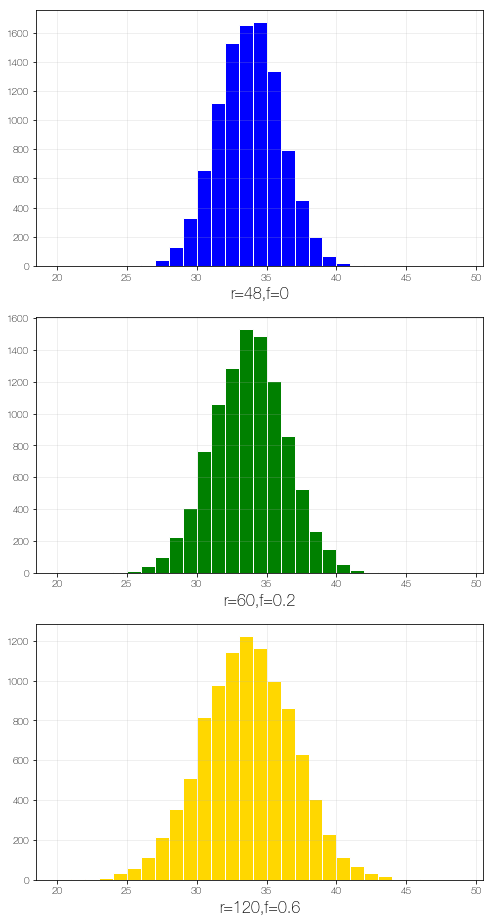

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,16))

labels = ["r=48,f=0","r=60,f=0.2","r=120,f=0.6"]
colors = ["blue","green","gold"]

for axi,x in enumerate(n_unique): 
    axes[axi].hist(x,bins=np.arange(20,50), color=colors[axi],edgecolor="white")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(labels[axi], fontsize=16)

**Part C**: Use your calculations in Part A to write down the expected number of successful PCRs, $k$, for each of the three scenarios that you made histograms for in Part B. What do you notice? 

Then, examine the 3 histograms, and explain the relationship, if any, between the histograms and your expected $k$ calculations.

**Solution**

The expected number of _successful_ PCRS in every case is 48. This is not the same as the number of unique var genes, but nevertheless, in expectation all the sampling should be the same. _However_, the variance increases in each case. This can be seen above in the plots, where you can, for example, note the number of trials in which there are only 25 sequences generated (the size of the bar at $k=25$). For blue, it's 0. For green it's just a handful. For gold, there are more. 

**Part D**: Lab scientists use what's called a _96-well plate_ to do experiments. A [96-well-plate](https://www.amazon.com/SEOH-Microplates-Well-Non-Sterile-Microchemistry/dp/B0088AR7Y6) is an 8-by-12 grid of little wells in which independent experiments can be conducted. Professor Amy Ferguson is wondering whether to dedicate a whole plate ($r=96$ independent PCR replicates) or a half plate ($r=48$ independent PCR replicates) to her PCR experiment. Or, she wonders whether she should use a different $r$ altogether. Use your code to simulate and compute answers to the following, assuming $f=0.1$:
* In expectation, how many _unique_ genes are produced for $r=48$?
* In expectation, how many _unique_ genes are produced for $r=96$?
* If $r$ is large, then the chance that $55$ or more <span style="color:green">_unique_</span> genes are sampled will increase. Professor Ferguson needs the probability that $55$ or more <span style="color:green">_unique_</span> genes are sampled to be greater than 95%. What should $r$ be? Support your answer by creating a plot of <span style="color:green">$P(\text{at-least-55-unique-sampled} \mid r)$</span> vs $r$.

In [7]:
print('In expectation, when r=48, there are {:.2f} unique genes.'.format(
    np.mean([len(draw_pcr_samples(48,0.1,var_repertoire)) for ii in range(100000)])))

In expectation, when r=48, there are 30.96 unique genes.


In [8]:
print('In expectation, when r=96, there are {:.2f} unique genes.'.format(
    np.mean([len(draw_pcr_samples(96,0.1,var_repertoire)) for ii in range(100000)])))

In expectation, when r=96, there are 45.95 unique genes.


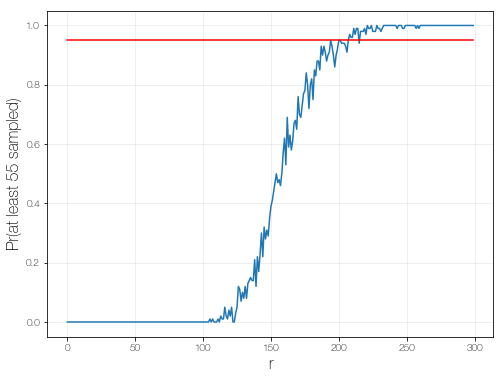

In [46]:
max_r = 300
prob_55_or_more = np.zeros(max_r)
for r in range(max_r):
    prob_55_or_more[r] = np.mean([(len(draw_pcr_samples(r,0.1,var_repertoire)) >=55) for ii in range(100)])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(np.arange(max_r),prob_55_or_more)
ax.plot(np.arange(max_r),0.95*np.ones(max_r),'r')
ax.set_xlabel("r",FontSize=16)
ax.set_ylabel("Pr(at least 55 sampled)",FontSize=16)
ax.grid(alpha=0.25)

Let's zoom in around $r=200$. 

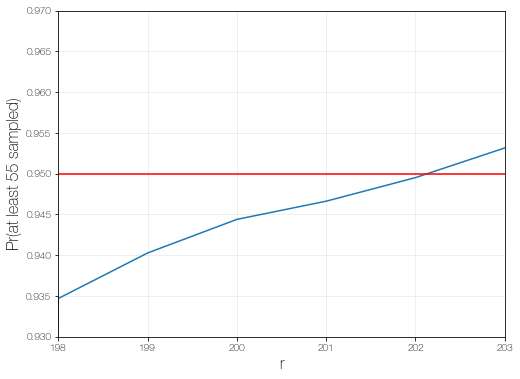

In [55]:
min_r = 198
max_r = 203
prob_55_or_more = np.zeros(max_r+1)
for r in range(max_r+1):
    if r < min_r:
        continue
    else:
        prob_55_or_more[r] = np.mean([(len(draw_pcr_samples(r,0.1,var_repertoire)) >=55) for ii in range(100000)])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(np.arange(max_r+1),prob_55_or_more)
ax.plot(np.arange(max_r+1),0.95*np.ones(max_r+1),'r')
ax.set_xlim([min_r,max_r])
ax.set_ylim([0.93,0.97])
ax.set_xlabel("r",FontSize=16)
ax.set_ylabel("Pr(at least 55 sampled)",FontSize=16)
ax.grid(alpha=0.25)

Looks like we should recommend $r=203$.

**Part E**: Bills, bills, bills. Professory Amy Ferguson has a decision to make about her lab budget. Here are some numbers:

* Each 96-well plate costs \$5 to buy. 
* The cheap PCR reagents cost $c=$\$0.05 per well and fail with probability $f=0.3$.
* The expensive PCR reagents cost $c=$\$0.10 per well and fail with probability $f=0.1$.
* The premium PCR reagents cost $c=$\$0.20 per well and fail with probability $f=0.05$.

Amy needs at least 50 unique sequences from a particular parasite genome for her experiment to be considered a success. She also knows that this whole PCR thing is a stochastic process, so while she might get 50 unique sequences in just $r=50$ attempts, that's going to be pretty rare. Still, increasing $r$ will increase the probability of success, i.e. of getting $\geq50$ unique sequences. 

Turns out, she needs to succeed with probability of at least 0.95. She could achieve this using the cheap reagents, the expensive reagents, or the premium reagents. Naturally, she'd need to buy more of the cheaper reagents, but... the tradeoff isn't clear. 

Help! Which reagents should she choose? State your answer clearly as a recommendation, and explain why you recommend that. Use figures and calculations as necessary to support your case.

You may assume:
* A 96-well plate costs \$5 even if fewer than 96 of the wells are actually used. For example, using 97 wells costs \$10, since it uses two plates.
* Reagents are billed on a per-well basis, not on a per-plate basis.
* The goal is to sample 50 or more unique sequences 95\% of the time or greater, but for as little money as possible.

In [29]:
# Hmmm. Let's write a function that empirically tells us the probability that we get ≥50 samples
def get_fraction_geq_x(r,f,n_draws,x=50):
    return np.mean([(len(draw_pcr_samples(r,f,var_repertoire)) >=x) for ii in range(n_draws)])

fvals = np.array([0.3,0.1,0.05])
rvals = np.array([188,144,137]) # I kept rerunning the code and changing these numbers till I got 0.95, 0.95, 0.95
pcr_cost = np.array([0.05,0.1,0.2])
for idx,f in enumerate(fvals):
    r = rvals[idx]
    prob = get_fraction_geq_x(r,f,n_draws=10000,x=50)
    cost = r*pcr_cost[idx] + 5*np.ceil(r/96)
    print("Reagent set {} with r={} succeeds w.p. {:.4f} and costs {:.2f}".format(idx,r,prob,cost))

Reagent set 0 with r=188 succeeds w.p. 0.9554 and costs 19.40
Reagent set 1 with r=144 succeeds w.p. 0.9542 and costs 24.40
Reagent set 2 with r=137 succeeds w.p. 0.9583 and costs 37.40


Based on the above, it's clear that we should use the cheaper reagents!

### [35 points] Problem 2: Parental Leave
***

The file `leave.tsv` is in the data folder. It contains information on paid parental leave policies for US and Canadian institutions for tenure-track professors. 

Answer the following questions and provide both _pseudocode_ and code for each question. In other words, in a #comment, explain what your code is doing in each step, and give the reader a hint why. (This is what we mean by pseudocode.)  Then, provide the code that answers the question. 

Note that `pandas` is your friend here. Also, note that the researchers may have coded missing data in a variety of ways, so you'll need to explore the file to learn what those are. 

**Part A**: Figure out what a `.tsv` file is and how to load it in using `pandas`. Call your dataframe `dfLeave`.

In [23]:
dfLeave = pd.read_csv('data/leave.tsv',delimiter='\t',encoding='utf-8')
dfLeave.head()

,university_name,short_name,is_private,rank,rank_ind,census_region,missing,paid_leave_len_woman,paid_leave_len_woman_units,paid_leave_weeks_woman,relief_woman,paid_leave_len_man,paid_leave_len_man_units,paid_leave_weeks_man,relief_man,link,notes,date
0,Arizona State University,Arizona State,0,108.72,101,West,0,6.0,week,6.0,Not specified,6.0,week,6.0,Not specified,https://provost.asu.edu/academic-personnel/par...,.,2/22/18
1,Auburn University,Auburn,0,126.69,122,South,0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,https://cws.auburn.edu/shared/content/files/85/,FMLA,2/22/18
2,Boston University,Boston,1,51.73,44,Northeast,0,1.0,term,14.0,Other,1.0,term,14.0,Other,https://www.bu.edu/handbook/leaves-absences/fa...,"Full semester for either parent, relief is FUL...",2/22/18
3,Brandeis University,Brandeis,1,84.55,78,Northeast,0,12.0,week,12.0,Not specified,12.0,week,12.0,Not specified,https://www.brandeis.edu/humanresources/docume...,.,2/22/18
4,Brigham Young University,Brigham Young,1,166.53,180,West,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not publicly accessible,Staff leave is 6wk,2/22/18


**Part B**: Answer the following summary questions:
* How many institutions are in the dataset? 
* How many actually have parental leave data in the `paid_leave_len_woman` column? 
* How many private institutions are there? 
* How many institutions have a note associated with them?

In [24]:
n_inst = len(dfLeave)
print('There are {} institutions.'.format(n_inst))

There are 205 institutions.


In [25]:
n_data = len(dfLeave["paid_leave_len_woman"].dropna())
print('There are {} institutions with leave data in the paid_leave_len_woman column.'.format(n_data))

There are 197 institutions with leave data in the paid_leave_len_woman column.


In [26]:
n_priv = dfLeave["is_private"].sum()
print('There are {} private institutions.'.format(n_priv))

There are 53 private institutions.


In [27]:
# inspecting dfLeave["notes"] (or the file itself) reveals that no notes are coded as "."
n_notes = n_inst - np.sum(dfLeave["notes"]=='.')
print('There are {} institutions with notes.'.format(n_notes))

There are 174 institutions with notes.


**Part C**: Is there statistical evidence at the $\alpha=0.05$ level that public and private institutions have different average paid parental leave durations? Answer the question separately for men and for women. Note that the researchers have conveniently included a column that converts durations into weeks. 

In [28]:
# drop missing data
# dfPassengers.drop(dfPassengers.index[[0]])
dfClean = dfLeave.drop(dfLeave.index[dfLeave["missing"]==1])
len(dfClean)
# yay 197. story checks out.

197

In [29]:
# slice and dice to get the values.
priv_women = dfClean.loc[dfClean["is_private"]==1,"paid_leave_weeks_woman"]
priv_men = dfClean.loc[dfClean["is_private"]==1,"paid_leave_weeks_man"]
pub_women = dfClean.loc[dfClean["is_private"]==0,"paid_leave_weeks_woman"]
pub_men = dfClean.loc[dfClean["is_private"]==0,"paid_leave_weeks_man"]

**CI Solution**

In [30]:
# put em in a list
datasets = [priv_women,pub_women,priv_men,pub_men]
# useful names
names = ['Private Women','Public Women', 'Private Men', 'Public Men']
# Confidence intervals
for idx,x in enumerate(datasets):
    xbar = x.mean()
    se = np.sqrt(x.var(ddof=1))
    n = len(x) # all n are > 30... use CLT
    zalphaovertwo = stats.norm.ppf(1-0.025)
    L = xbar - zalphaovertwo*(se/np.sqrt(n))
    U = xbar + zalphaovertwo*(se/np.sqrt(n))
    print(names[idx],'\t[{:.2f},{:.2f}]'.format(L,U))

Private Women 	[8.74,12.31]
Public Women 	[6.55,9.85]
Private Men 	[7.01,10.82]
Public Men 	[4.85,7.46]


We can't draw conclusions. While we can REJECT a null hypothesis due to nonoverlapping CIs... these results are ambiguous. See next cell for the CORRECT approach.

In [31]:
# CI for difference of means.

# women
xbar = priv_women.mean() - pub_women.mean()
se = np.sqrt(priv_women.var(ddof=1)/len(priv_women) + pub_women.var(ddof=1)/len(pub_women))
zalphaover2 = stats.norm.ppf(1-0.05/2)
L = xbar - zalphaovertwo*se
U = xbar + zalphaovertwo*se
print('Women\t[{:.2f},{:.2f}]'.format(L,U))

# men
xbar = priv_men.mean() - pub_men.mean()
se = np.sqrt(priv_men.var(ddof=1)/len(priv_men) + pub_men.var(ddof=1)/len(pub_men))
L = xbar - zalphaovertwo*se
U = xbar + zalphaovertwo*se
print('Men\t[{:.2f},{:.2f}]'.format(L,U))

Women	[-0.11,4.75]
Men	[0.45,5.07]


The women's CI includes zero. But the men's does not. The men are statistically significantly different at public vs private.  

** p-value / z-test Solution **

In [32]:
# p-value test for difference of means.

# women
xbar = priv_women.mean() - pub_women.mean()
se = np.sqrt(priv_women.var(ddof=1)/len(priv_women) + pub_women.var(ddof=1)/len(pub_women))
z = (xbar-0)/se
pval = 2*stats.norm.cdf(-np.abs(z))
print('p-val women:\t {:.4f}'.format(pval))
print('|z| women:\t {:.4f}'.format(np.abs(z)))

# men
xbar = priv_men.mean() - pub_men.mean()
se = np.sqrt(priv_men.var(ddof=1)/len(priv_men) + pub_men.var(ddof=1)/len(pub_men))
z = (xbar-0)/se
pval = 2*stats.norm.cdf(-np.abs(z))
print('p-val men:\t {:.4f}'.format(pval))
print('|z| men:\t {:.4f}\n'.format(np.abs(z)))


print('\nalpha = 0.05 and z_crit = {:.4f}'.format(stats.norm.ppf(1-0.05/2)))

p-val women:	 0.0614
|z| women:	 1.8707
p-val men:	 0.0190
|z| men:	 2.3446


alpha = 0.05 and z_crit = 1.9600


We can reject the null hypothesis for men, but not for women. 

**Part D**: Some institutions provide zero weeks of paid parental leave. For each `census_region` in the dataset, create a 95% confidence interval for the _proportion of universities that offer zero paid parental leave to their professors_. <span style="color:red">Since a policy may offer paid parental leave to men, women, both, or neither, please consider a policy that offers any paid parental leave to men _or_ women _or_ both to qualify as non-zero paid parental leave. For example, a university that offers women 6 weeks and men 0 weeks _does_ qualify as a non-zero paid parental leave policy</span>. Based on your observations, is there evidence that policies vary significantly by census region? 

Please note that the number of data points varies from one census region to another, and therefore, different methods may be required to compute confidence intervals for the proportions in different census regions. _Clearly_ state which methods were used to create each confidence interval.

For clarity, please plot your confidence intervals as vertical bars in a single plot. From left to right, please plot in the order `Canada`, `Northeast`, `Midwest`,`South`, `West`.

In [33]:
regions = ["Canada","Northeast","Midwest","South","West"]
for reg in regions:
    dfReg = dfClean.loc[dfClean["census_region"]==reg,["paid_leave_weeks_woman","paid_leave_weeks_man"]]
    print(reg,'n={}'.format(len(dfReg)))

Canada n=19
Northeast n=44
Midwest n=38
South n=58
West n=38


Looks like we'll need to bootstrap a CI for Canada since n=19 and the data are not normal. We can use the CLT to get CIs for the others OR we could bootstrap.

In [34]:
# data in x
def boots_p(x,n_resamples=100000,alpha=0.05):
    n = len(x)
    p = np.zeros(n_resamples)
    for ii in np.arange(n_resamples):
        y = np.random.choice(x,size=n)
        p[ii] = np.sum(y==0)/n
    return [np.percentile(p,100*alpha/2),np.percentile(p,100*(1-alpha/2))]

In [35]:
alpha = 0.05
CIs = {}
for reg in regions:
    dfReg = dfClean.loc[dfClean["census_region"]==reg,["paid_leave_weeks_woman","paid_leave_weeks_man"]]
    x = dfReg["paid_leave_weeks_man"]+dfReg["paid_leave_weeks_woman"]
    n = len(x)
    if n > 30:
        #CLT
        p = np.sum(x==0)/n
        CIs[reg] = [p-stats.norm.ppf(1-alpha/2)*np.sqrt(p*(1-p)/n), p+stats.norm.ppf(1-alpha/2)*np.sqrt(p*(1-p)/n)]
    else:
        #bootstrap (coded above)
        CIs[reg] = boots_p(x)

for key in CIs:
    print("[{:.3f},{:.3f}]\t{}".format(CIs[key][0],CIs[key][1],key))

[0.000,0.316]	Canada
[0.161,0.430]	Northeast
[0.264,0.578]	Midwest
[0.424,0.680]	South
[0.168,0.464]	West


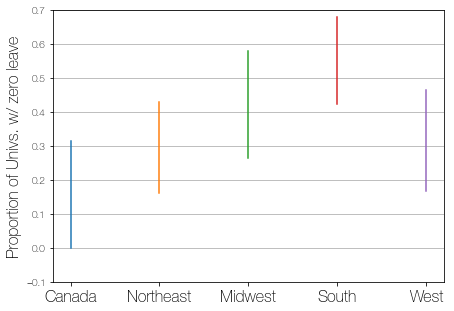

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
for ii,reg in enumerate(CIs):
    ax.plot([ii,ii],CIs[reg])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(regions,fontSize=16)
ax.set_ylim([-0.1,0.7])
ax.set_ylabel('Proportion of Univs. w/ zero leave',fontSize=16)
ax.yaxis.grid(alpha)

Since some of these confidence intervals do not overlap, we can conclude that there is indeed variation by region.

### [30 points] Problem 3: Multiple Linear Otter-gression 
***

After years of study and professional development, you have finally landed your dream job as lead otter scientist.  As your first project, you wish to use multiple linear regression to understand and predict what makes otters Instagrammable, as measured during many observations of otters, conducted by students.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file `otters.csv`. 

**Response**: 

- $\texttt{instagrammability}$: The instagrammability of a particular otter, measured by a complicated formula involving likes, comments, DMs, reposts, and new followers.

**Features**: 

- $\texttt{urchin color}$: the depth of color of the urchins nearby, measured in Wongs. 
- $\texttt{fur fluff}$: the fluff factor of the otter's fur, measured in Ketelsens.
- $\texttt{adorbz}$: unknown variable. The students keep writing it down. Units unknown.
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{majesty}$: the majesty of this particular otter in this particular photo, measured as a fraction of maximum majesty (between 0 and 1). 
- $\texttt{observer GPA}$: the GPA of the student who recorded the data.
- $\texttt{paw size}$: measured as some kind of deviation away from the median paw size. Units unknown.
- $\texttt{paw grip}$: grip strength of paw (estimated) measured in Grochows. 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the concession stand 
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on the day of observation


**Part A**: Read the data from **otters.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [188]:
dfR = pd.read_csv("data/otters.csv")
dfR = dfR.dropna()

def nums_only(s):
    return float(''.join(c for c in s if (c.isdigit() or c==".")))

dfR["urchin color"] = dfR["urchin color"].apply(nums_only)
dfR["fur fluff"] = dfR["fur fluff"].apply(nums_only)
dfR["temp"] = dfR["temp"].apply(nums_only)
dfR.head()

,instagrammability,urchin color,fur fluff,adorbz,temp,majesty,observer GPA,paw size,paw grip,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62.0,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63.0,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55.0,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52.0,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57.0,0.89,2.40,-6.0,43.0,186.0,0.0


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

**Solution**: We perform a full F-test with the hypotheses: 

$$
\begin{array}{ll}
H_0: & \beta_1 = \beta_2 = \ldots = \beta_{10} = 0  \\
H_1: & \beta_k \neq 0 \textrm{ for at least one } k=1, \ldots, 10  \\
\end{array}
$$

Luckily, sm.OLS can perform this test for us.  We have 

In [194]:
y = dfR["instagrammability"]
X = dfR.loc[:,dfR.columns != "instagrammability"]
X = sm.add_constant(X)
full_model = sm.OLS(y, X).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      instagrammability   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     572.2
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           8.10e-66
Time:                        21:48:24   Log-Likelihood:                -249.37
No. Observations:                  85   AIC:                             520.7
Df Residuals:                      74   BIC:                             547.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -35.2765     13.517     -2.610      0.011     -62.210      -8.343
urchin color       0.9940      0.113      8.832      0.000       0.770       1.218
fur fluff          4.0447      0.689      5.868      0.000       2.671       5.418
adorbz             0.4486      0.037     12.183      0.000       0.375       0.522
temp              -0.9955      0.082    -12.181      0.000      -1.158      -0.833
majesty           -2.7631      3.823     -0.723      0.472     -10.380       4.854
observer GPA       0.8343      0.969      0.861      0.392      -1.096       2.765
paw size           5.0875      0.083     61.298      0.000       4.922       5.253
paw grip          -0.0108      0.014     -0.749      0.457      -0.040       0.018
ice cream sold     0.0127      0.011      1.121      0.266      -0.010       0.035
shark attacks      0.4050      0.694      0.584      0.561      -0.978       1.788
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.985
Skew:                           0.170   Prob(JB):                        0.611
Kurtosis:                       2.597   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the model summary we see that the F-statistic of interest is $F = 648.8$ with an associated p-value of $8.27\times 10^{-68}$.  Since this is less than $\alpha = 0.05$ we reject the null hypothesis and conclude that at least one of the provided features is related to the response. 

**Part C**: Write a function **forward_select**(df, resp_str, maxk) that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

In [196]:
def forward_selection(df, resp_str="instagrammability", maxp=5):
    
    # set response vector 
    y = df[resp_str]
    
    # get potential features 
    remaining_features = list(df.columns[df.columns != resp_str])
    
    # initialize good features list 
    good_features = []
    
    # perform forward selection 
    for p in range(maxp):
        SSEs = []
        for feat in remaining_features:
            X = df[good_features + [feat]]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit() 
            SSEs.append(np.sum((y-model.predict(X))**2))
        new_feat = remaining_features[np.argmin(SSEs)]
        good_features = good_features + [new_feat]
        remaining_features.remove(new_feat)
        print("Stage {}, added feature: {}".format(p+1, new_feat))
        
    return good_features
              
good_features = forward_selection(dfR, resp_str="instagrammability", maxp=5)

Stage 1, added feature: paw size
Stage 2, added feature: temp
Stage 3, added feature: adorbz
Stage 4, added feature: urchin color
Stage 5, added feature: fur fluff


**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

In [198]:
y = dfR["instagrammability"]
Xred = dfR.loc[:, good_features]
Xred = sm.add_constant(Xred)
red_model = sm.OLS(y, Xred).fit()
red_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      instagrammability   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1172.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           1.49e-72
Time:                        21:49:50   Log-Likelihood:                -251.10
No. Observations:                  85   AIC:                             514.2
Df Residuals:                      79   BIC:                             528.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -34.7049     12.561     -2.763      0.007     -59.706      -9.704
paw size         5.0980      0.078     65.149      0.000       4.942       5.254
temp            -0.9774      0.031    -31.160      0.000      -1.040      -0.915
adorbz           0.4595      0.034     13.382      0.000       0.391       0.528
urchin color     1.0001      0.110      9.132      0.000       0.782       1.218
fur fluff        3.7045      0.639      5.797      0.000       2.433       4.976
==============================================================================
Omnibus:                        1.019   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                1.059
Skew:                           0.249   Prob(JB):                        0.589
Kurtosis:                       2.776   Cond. No.                     6.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The obtained reduced model is: 

$$
\hat{y} =  -34.7 + 5.1\times\texttt{paw size} 
- 0.98\times\texttt{temp} 
+ 0.46\times\texttt{adorbz} 
+ 1.00\times\texttt{urchin color} 
+ 3.70\times\texttt{fur fluff} 
$$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

**Solution**: Our null hypothesis is that the true parameters on the features not included in the reduced model are zero.  Our alternate hypothesis is that at least one of the slopes associated with a missing feature is important: 

$$
\begin{array}{ll}
H_0: \beta_{grip} = \beta_{ice~cream} = \beta_{sharks} = \beta_{majesty} = \beta_{GPA} = 0 \\
H_1: \beta_{k} \neq 0 \textrm{ for at least one } k \in \{grip, ice~cream, sharks, majesty, GPA \} \\
\end{array}
$$

We will evaluate our hypothesis by performing a Partial F-Test of the form 

$$
F = \dfrac{(SSE_{red} - SSE_{full})/(p-k)}{SSE_{full}/(n-p-1)} \sim F_{p-k, n-p-1}
$$

In [199]:
SSE_red = np.sum((y-red_model.predict(Xred))**2)
SSE_full = np.sum((y-full_model.predict(X))**2)
p = len(dfR.columns)-1
k = len(good_features) 
n = len(dfR)
F = ((SSE_red - SSE_full)/(p-k))/((SSE_full)/(n-p-1))
print("SSE_full = ", SSE_full)
print("SSE_red = ", SSE_red)
print("num_dfs = {}".format(p-k))
print("den_dfs = {}".format(n-p-1))
print("F = {:.3f}".format(F))
pval = 1 - stats.f.cdf(F, p-k, n-p-1)
print("P(>F) = {}".format(pval))
print("RR: F > = {}".format(stats.f.ppf(1-.05, p-k, n-p-1)))


SSE_full =  1758.5467865482624
SSE_red =  1831.8999447515328
num_dfs = 5
den_dfs = 74
F = 0.617
P(>F) = 0.6869307378940674
RR: F > = 2.338277630605569


Since our p-value is greater than $\alpha = 0.05$ we fail to reject the null hypothesis and thus conclude that there is insufficient evidence to believe that the full model is statistically significantly better than the reduced model obtained by forward selection. 

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict an otter's instagrammability when the following features are observed: 

- $\texttt{urchin color}$: 93 Wongs
- $\texttt{fur fluff}$: 8.2 Ketelsens
- $\texttt{adorbz}$: 273
- $\texttt{temp}$: 46F 
- $\texttt{majesty}$: 0.79 
- $\texttt{observer GPA}$: 3.50 
- $\texttt{paw size}$: -10 
- $\texttt{paw grip}$: 55 Grochows
- $\texttt{ice cream sold}$: 130
- $\texttt{shark attacks}$: 3 

**Solution**: Using only the features in our reduced model, we have 

In [200]:
data = {'const': 1, "paw size": -10, "temp": 46, "adorbz": 273, "urchin color": 93, "fur fluff": 8.2}
yhat = 0 
for feat, slope in zip(red_model.params.index, red_model.params):
    yhat += data[feat] * slope 
print("yhat = {:.3f}".format(yhat))

yhat = 118.195
